# Содержание

- [Предварительная обработка данных](#1)
    - [Импорт набора данных](#11)
    - [Поиск пропусков](#12)
    - [Поиск дубликатов](#13)
    - [Приведение типов данных](#14)
    - [Определение сбалансированности](#15)
- [Исследовательский анализ данных](#2)
    - [Обзор данных](#21)
    - [Поиск выбросов](#22)
    - [Постановка задач](#23)
        - [Корреляция параметров организма и курения](#231)
        - [Обобщённый портрет курильщика](#232)
        - [Обобщённый портрет выпивающего человека](#233)
        - [Влияние алкоголя на состояние организма](#234)

# Предварительная обработка данных <a id="1"></a>

Основной целью данной части является осмотр данных с целью:
* Поиска и устранения пропусков в данных;
* Приведения столбцов к истинным форматам данных;
* Поиска и устранение явных и неявных дубликатов данных;
* Поиска и устранение выбросов в данных, если таковые присутствуют;
* Определения, являются ли классы, сформированные целевой переменной, сбалансированными.

## Импорт набора данных <a id="11"></a>

В начале выполнения всей работы импортируем все необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Перед началом осмотра данных их необходимо как-то извлечь из CSV-файла (Comma-Separated Values). Для этого существует библиотека **Pandas** для языка Python, которая предоставляет широкий спектр инструментов для аналитики данных. <br>
Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм *(так называется сущность для хранения данных в Pandas)* из CSV-файла:

In [2]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

Далее, чтобы убедиться в том, что данные были импортированы успешно, попробуем вывести первые 5 строк из датафрейма. Для этого в Pandas существует команда `.head()`.

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


Исходя из полученной после выполнения команды таблицы, можно сделать вывод о том, что импорт данных проведён успешно и можно приступать к дальнейшим этапам.

## Поиск пропусков <a id="12"></a>

Далее, перейдём уже непосредственно к предварительной обработки данных. И на первом этапе изучим набор данных на наличие пропусков среди данных.

При поиске пустых данных зачастую применяют специальный метод `.isna()`, который покажет, присутствуют ли пустые значения в каждом из столбцов.

Однако проблема использования данного метода заключается в том, что он просматривает всю таблицу и если где-то отсутствует хоть одно значение, то он выведет *True*, иначе *False*. Если же необходимо посчитать количество пропущенных значений, то вместе с исходным методом применяют `.sum()`.

Таким образом, итоговая команда выглядит как показано ниже:

In [4]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Исходя из полученного результата, можно сделать вывод о том, что в исходном наборе данных **отсутствуют пустые значения**.

## Поиск дубликатов <a id="13"></a>

Следующим этапом при обработке данных идет поиск дубликатов. Обычно он делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Рассмотрим **первый случай**.

Для поиска явных дубликатов применяется метод `.duplicated()`, который ищет все дубликаты среди строк. По умолчанию данный метод признаёт дубликатами те строки, которые полностью повторяют уже встречавшиеся в наборе данных. Т.е. метод, как и в случае с методом `.isna()`, возвращает значение либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случае, функцию `.sum()`. 

In [5]:
df.duplicated().sum()

26

Как можно заметить, результат выполнения комбинации данных функций показал наличие 26 полностью повторяющихся строк. Для того, чтобы оценить, насколько сильно данные 26 строк влияют на общую картину данных, выведем общую длину набора данных при помощи встроенной функции `len()`.

In [6]:
print(f"Общий объем данных: {len(df)}")
print(f"Процент продублированных данных: {df.duplicated().sum() / len(df):.5f} %")

Общий объем данных: 991346
Процент продублированных данных: 0.00003 %


Как можно заметить, процентное отношение дубликатов к общему объему данных невелико, и по идеи можно и опустить факт наличия дубликатов в данных. Однако, для чистоты эксперимента от дубликатов необходимо избавиться. Для этого в **Pandas** реализован метод `.drop_duplicates()`, который в качестве результата своего выполнения возвращает датафрейм без дубликатов.

Также, поскольку после удаления продублированных строк их индексы также будут удалены, то необходимо использовать метод `.reset_index()`, который проиндексирует все строки заново.

Таким образом, для того, чтобы убедится в том, что продублированные строки удалены из общего объема данных, выполним следующий набор команд.

In [7]:
print(f"Количество дубликатов до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

Количество дубликатов до удаления: 26
Количество дубликатов после удаления: 0


Далее, рассмотрим способ поиска **неявных дубликатов**. Неявными дубликатами являются разного рода ошибки в столбцах с данными (грамматические ошибки, опечатки и т.д.). Для поиска таких дубликатов применяется метод `.unique()` для каждого столбца датафрейма. Также, чтобы дубликаты было проще найти, применяют сортировку при помощи метода `.sort()`.

В итоге, применим данные методы и оценим набор данных на наличие неявных дубликатов.


In [8]:
for col in df:
    print(col, end="\n")
    vals = df[col].unique()
    vals.sort()
    print(vals, "\n")

sex
['Female' 'Male'] 

age
[20 25 30 35 40 45 50 55 60 65 70 75 80 85] 

height
[130 135 140 145 150 155 160 165 170 175 180 185 190] 

weight
[ 25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110
 115 120 125 130 135 140] 

waistline
[  8.   27.   30.   32.   35.   40.   42.   43.   48.   49.   50.   50.3
  50.5  51.   51.1  51.2  51.5  51.6  51.8  52.   52.1  52.4  52.5  52.6
  53.   53.1  53.2  53.4  53.5  53.6  53.8  54.   54.1  54.2  54.3  54.4
  54.5  54.6  54.8  54.9  55.   55.1  55.2  55.3  55.4  55.5  55.6  55.7
  55.8  55.9  56.   56.1  56.2  56.3  56.4  56.5  56.6  56.7  56.8  56.9
  57.   57.1  57.2  57.3  57.4  57.5  57.6  57.7  57.8  57.9  58.   58.1
  58.2  58.3  58.4  58.5  58.6  58.7  58.8  58.9  59.   59.1  59.2  59.3
  59.4  59.5  59.6  59.7  59.8  59.9  60.   60.1  60.2  60.3  60.4  60.5
  60.6  60.7  60.8  60.9  61.   61.1  61.2  61.3  61.4  61.5  61.6  61.7
  61.8  61.9  62.   62.1  62.2  62.3  62.4  62.5  62.6  62.7  62.8  62.9
  63.   63.1  6

Проанализировав полученные результаты можно сделать вывод о том, что неявных дубликатов в исходном наборе данных не наблюдается.

## Приведение типов данных <a id="14"></a>

В процессе поиска неявных дубликатов было замечено, что многие столбцы исходного набора данных имеют неверный тип данных. В связи с этим, повторно выведем основную информацию о датафрейме при помощи метода `.info()`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  float64
 8   hear_right        991320 non-null  float64
 9   SBP               991320 non-null  float64
 10  DBP               991320 non-null  float64
 11  BLDS              991320 non-null  float64
 12  tot_chole         991320 non-null  float64
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        991320 

После сравнения типов столбцов с их значениями было получено:
* Столбец `hear_left` преобразовать в `int`;
* Столбец `hear_right` преобразовать в `int`;
* Столбец `SBP` преобразовать в `int`;
* Столбец `DBP` преобразовать в `int`;
* Столбец `BLDS` преобразовать в `int`;
* Столбец `DBP` преобразовать в `int`;
* Столбец `tot_chole` преобразовать в `int`;
* Столбец `HDL_chole` преобразовать в `int`;
* Столбец `LDL_chole` преобразовать в `int`;
* Столбец `triglyceride` преобразовать в `int`;
* Столбец `urine_protein` преобразовать в `int`;
* Столбец `SGOT_AST` преобразовать в `int`;
* Столбец `SGOT_ALT` преобразовать в `int`;
* Столбец `gamma_GTP` преобразовать в `int`;
* Столбец `SMK_stat_type_cd` преобразовать в `int`.

Для того, чтобы преобразовать столбец к другому типу данных в **Pandas** реализован специальный метод `.astype()`, который преобразует любой объект, созданный библиотекой Pandas, к требуемому типу данных.

Таким образом, для того, чтобы преобразовать все обнаруженные столбцы, необходимо выполнить следующие строки кода:

In [10]:
cols = [
    "hear_left",
    "hear_right",
    "SBP",
    "DBP",
    "BLDS",
    "DBP",
    "tot_chole",
    "HDL_chole",
    "LDL_chole",
    "triglyceride",
    "urine_protein",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP",
    "SMK_stat_type_cd",
]
for col in cols:
    df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int32  
 8   hear_right        991320 non-null  int32  
 9   SBP               991320 non-null  int32  
 10  DBP               991320 non-null  int32  
 11  BLDS              991320 non-null  int32  
 12  tot_chole         991320 non-null  int32  
 13  HDL_chole         991320 non-null  int32  
 14  LDL_chole         991320 non-null  int32  
 15  triglyceride      991320 non-null  int32  
 16  hemoglobin        991320 

Помимо этого, на этапе поиска неявных дубликатов было обнаружено, что столбцы `sex` и `DRK_YN` являются биномиальными параметрами, т.е. существует всего лишь 2 возможных значения в данных столбцах: male/female и Y/N соответственно.

В связи с этим было принято решения изменить данные из этих двух столбцов, заменив их на 1 и 0. Пусть в столбце `sex` будет произведена следующая замена: `male -> 0, female -> 1`, а в столбце `DRK_YN` следующая: `Y -> 1, N -> 0`.

Для того, чтобы произвести данную замену в **Pandas** реализован метод `replace()`, который заменяет выбранное на то, которое требуется. Таким образом, произведём замену данных в выбранных столбцах.

In [11]:
df["DRK_YN"] = df["DRK_YN"].replace("N", 0).replace("Y", 1)
df["sex"] = df["sex"].replace("Male", 0).replace("Female", 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  int64  
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int32  
 8   hear_right        991320 non-null  int32  
 9   SBP               991320 non-null  int32  
 10  DBP               991320 non-null  int32  
 11  BLDS              991320 non-null  int32  
 12  tot_chole         991320 non-null  int32  
 13  HDL_chole         991320 non-null  int32  
 14  LDL_chole         991320 non-null  int32  
 15  triglyceride      991320 non-null  int32  
 16  hemoglobin        991320 

Таким образом, после выполнения преобразования столбцов исходного датафрейма, используются всего лишь два типа данных: **int** и **float**

## Определение сбалансированности <a id="15"></a>

В задаче классификации данные называются **несбалансированными** (imbalanced data), если в обучающей выборке доли объектов разных классов существенно различаются, также говорят, что "*классы не сбалансированы*"

Для того, чтобы выяснить, являются ли данные сбалансированными, посчитаем количество людей, относящихся к первому и второму классу, а также выведем их процентное соотношение ко всем данным.

In [12]:
dont_drink = len(df[df["DRK_YN"] == 0])
drink = len(df[df["DRK_YN"] == 1])
print(
    f"""
Количество непьющих: {dont_drink}, их процент от общего числа: {dont_drink/len(df):.4f} 
Количество выпивающих: {drink}, их процент от общего числа: {drink/len(df):.4f}"""
)


Количество непьющих: 495844, их процент от общего числа: 0.5002 
Количество выпивающих: 495476, их процент от общего числа: 0.4998


Как видно из полученных значений, данные являются отлично сбалансированными. Следовательно, можно завершать этап предварительной обработки данных и переходить в следующему этапу.

# Исследовательский анализ данных <a id="2"></a>

**Исследовательский анализ данных** (англ. *exploratory data analysis, EDA*) - анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

К основным целям исследовательского анализа данных обычно относят следующие:
1) Понимание структуры и характеристик набора данных;
2) Выявление аномалий и выбросов;
3) Идентификация связей и корреляций между переменными;
4) Подготовка данных для дальнейших этапов анализа.

## Обзор данных <a id="21"></a>

Теперь необходимо получить базовое представление о том, с какими данными будет производится работа. Для этого необходимо посмотреть, какие данные хранятся в каждом из столбцов исходного набора данных.

Для начала проведём оценочный анализ данных при помощи метода `.info()`. Данная функция возвращает названия столбцов, типы данных, количество ненулевых объектов в каждом столбце.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  int64  
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int32  
 8   hear_right        991320 non-null  int32  
 9   SBP               991320 non-null  int32  
 10  DBP               991320 non-null  int32  
 11  BLDS              991320 non-null  int32  
 12  tot_chole         991320 non-null  int32  
 13  HDL_chole         991320 non-null  int32  
 14  LDL_chole         991320 non-null  int32  
 15  triglyceride      991320 non-null  int32  
 16  hemoglobin        991320 

Исходя из выводимой информации, можно сделать вывод о том, что в исходном наборе данных используются 3 типа данных: **текстовые поля**, **целые числа**, **дробные числа**.

Также, в выходном сообщении показано, что в датафрейме **отсутствуют** нулевые значения в каждом из столбцов. Однако это нужно будет перепроверить при более подробном осмотре данных.

Далее, исходя из названий столбцов, можно заметить следующее:
* `sex` - биномиальный параметр, определяет пол пациента (мужской/женский);
* `age` - возраст пациента, округлённый до 5 лет (10, 15, ...);
* `height` - рост пациента, округлённый до 5 см (150, 155, ...);
* `weight` - вес пациента, округлённый до 5 кг (40, 45, ...);
* `waistline` - обхват талии пациента в см.;
* `sight_left` - зрение пациента на левый глаз (0.1 - 2.5);
* `sight_right` - зрение пациента на правый глаз (0.1 - 2.5);
* `hear_left`- биномиальный параметр, определяющий слух пациента на левое ухо (1 - нормальный, 2 - ненормальный);
* `hear_right`- биномиальный параметр, определяющих слух пациента на правое ухо (1 - нормальный, 2 - ненормальный);
* `SBP`- систолическое артериальное давление - максимальное давление в артериях в момент, когда сердце сжимается и выталкивает кровь в артерии. Нормальный уровень САД взрослого человека около 120 мм. рт. ст.;
* `DBP`- диастолические артериальное давление - нижняя граница при измерении артериального давления. Оно определяется, когда сердце расслабляется и наполняется кровью. Нормальный уровень у взрослого человека около 80 мм. рт. ст.;
* `BLDS`- уровень глюкозы в крови натощак. Нормальное значение у здорового взрослого человека примерно 70-99 мг/дл;
* `tot_chole`- общий уровень холестерина в крови пациента в мг/дл.;
* `HDL_chole`- уровень холестерина липопротеидов высокой плотности в мг/дл.;
* `LDL_chole`- уровень холестерина липопротеидов низкой плотности в мг/дл.;
* `triglyceride`- уровень триглицерина в крови в мг/дл.;
* `hemoglobin`- уровень гемоглобина в крови в г/дл.;
* `urine_protein`- количество белка в моче (1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4));
* `serum_creatinine`- уровень креатинина сыворотки в крови в мг/дл.;
* `SGOT_AST`- уровень АСТ в крови в ед./л.;
* `SGOT_ALT`- уровень АЛТ в крови в ед./л.;
* `gamma_GTP`- уровень гамма-ГТ в крови в ед./л.;
* `SMK_stat_type_cd`- отношение пациента к курению (1-никогда не курил, 2 – раньше курил, но бросил, 3 – продолжаю курить);
* `DRK_YN`- биномиальный параметр, отражающий отношение пациента к алкоголю (пьющий/непьющий).

Таким образом, можно сделать вывод о том, что данный набор данных был собран и опубликован в рамках некоторого медицинского исследования. В качестве заключительного действия на данном этапе определим массивы столбцов, принадлежащих разным категориям данных.

In [14]:
numeric = ["age", "height", "weight", "waistline",
           "sight_left", "sight_right", "SBP", "DBP",
           "BLDS", "tot_chole", "HDL_chole", "LDL_chole",
           "triglyceride", "hemoglobin", "serum_creatinine",
           "SGOT_AST", "SGOT_ALT", "gamma_GTP"]
categorical = ["hear_left", "hear_right", "urine_protein"]

## Поиск выбросов <a id="22"></a>

После преобразования всех типов данных, необходимо оценить исходные данные на наличие выбросов. **Выбросами** в данных являются те значения, которые сильно отличаются от большинства других значений в наборе данных. Если в исходном наборе данных присутствуют выбросы, то от них лучше избавиться, поскольку они могут вносить существенные изменения в результаты анализа, а в дальнейшем и на обучение моделей.

Существует множество методов обнаружения, но в самым простым из них является **экстремальный анализ данных** (англ. *extreme value analysis*). При таком анализе не применяются какие-либо специальные статистические методы. Алгоритм использования таков:
1) Визуализировать данные, используя диаграммы и гистограммы для нахождения экстремальных значений;
2) Задействовать распределение, например Гауссовское, и найти значения, чье стандартное отклонение отличается в 2-3 раза от математического ожидания;
3) Отфильтровать предполагаемые выбросы из обучающей выборки и оценить работу модели.

В соответствии с первым шагом предложенного алгоритма визуализируем данные всех интересующих столбцов. Обычно, для этого импортируют библиотеку **Seaborn** и используют метод `.pairplot()`. По умолчанию эта функция создаст сетку осей таким образом, что данные из каждого числового столбца исходного датафрейма будут распределены как по оси X, так и по оси Y. Диагональные графики же показывают гистограммы распределений данных из численных столбцов

Однако, поскольку исходный датафрейм состоит из 25 столбцов, то создание такой диаграммы может занять очень продолжительное время. Поэтому, было принято решение построить для начала графики только тех столбцов, в которых могут быть выбросы. В качестве функции для построение графика была выбрана `.boxplot()`, которая рисует диаграмму 'ящик с усами', который показывает наличие или отсутствие выбросов.

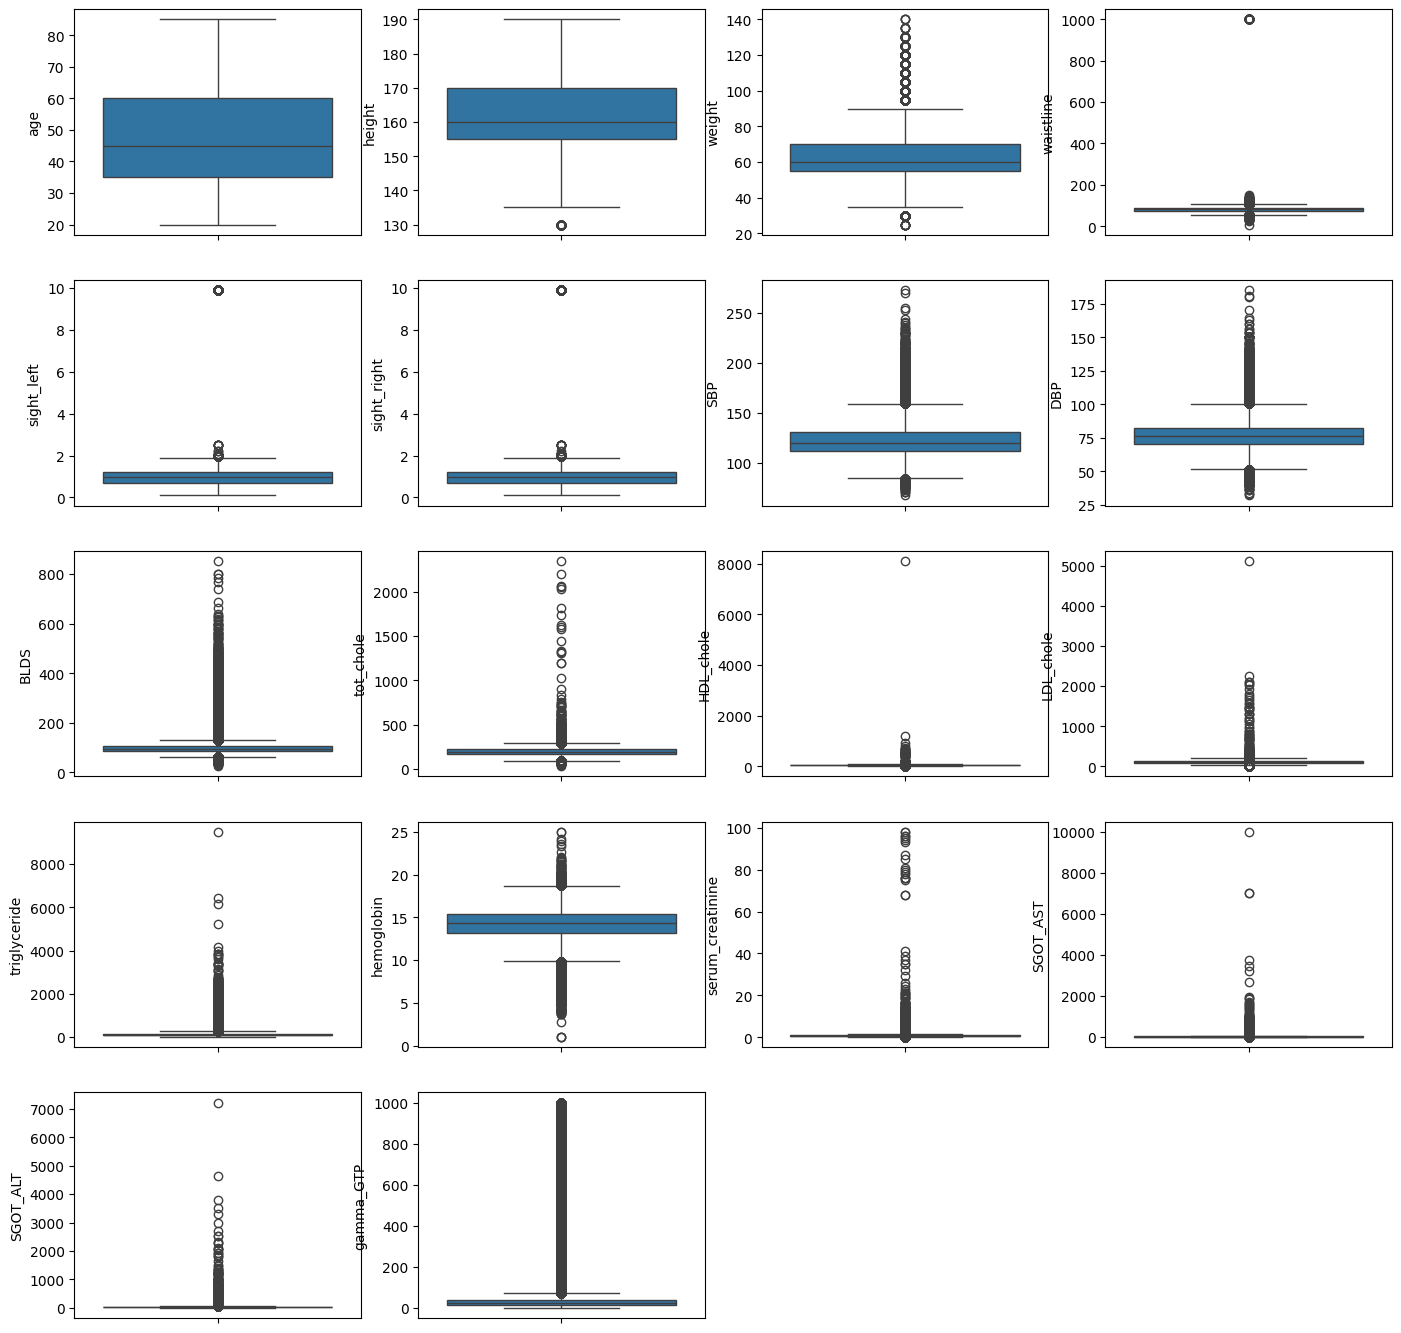

In [15]:
rows, cols = 5, 4
plt.figure(figsize=(17, 17))
for i in range(len(numeric)):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(df[numeric[i]])

Исходя из полученных графиков можно заметить, что не все столбцы имеют выбросы. Также, можно создать список столбцов, которые необходимо рассмотреть отдельно:
* Waistline
* sight_left
* sight_right
* HDL_chole
* LDL_chole
* triglyceride
* SGOT_AST
* SGOT_ALT

Далее выведем описательную статистику данных столбцов, чтобы оценить величины среднего значения и стандартного отклонения

In [16]:
df[["waistline", "sight_left", "sight_right", "HDL_chole", "LDL_chole", "triglyceride", "SGOT_AST", "SGOT_ALT"]].describe()

,waistline,sight_left,sight_right,HDL_chole,LDL_chole,triglyceride,SGOT_AST,SGOT_ALT
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,81.233255,0.980833,0.978428,56.936984,113.037429,132.140030,25.989424,25.755148
std,11.850296,0.605954,0.604779,17.238578,35.842938,102.194762,23.493668,26.308910
min,8.000000,0.100000,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,74.100000,0.700000,0.700000,46.000000,89.000000,73.000000,19.000000,15.000000
50%,81.000000,1.000000,1.000000,55.000000,111.000000,106.000000,23.000000,20.000000
75%,87.800000,1.200000,1.200000,66.000000,135.000000,159.000000,28.000000,29.000000
max,999.000000,9.900000,9.900000,8110.000000,5119.000000,9490.000000,9999.000000,7210.000000


### Waistline

Выведем гистограмму для первого столбца из списка. Для этого также воспользуемся методом `.histplot()`

<Axes: xlabel='waistline', ylabel='Count'>

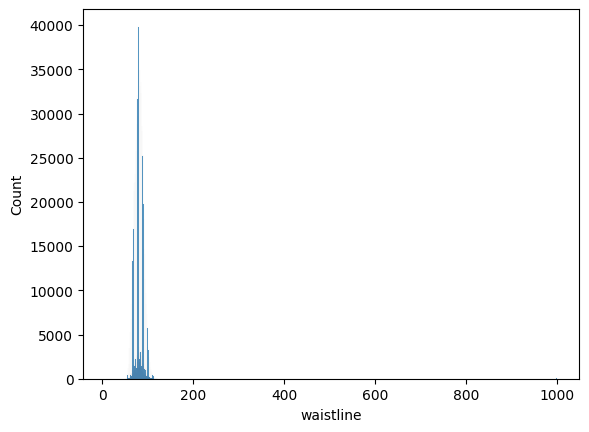

In [17]:
sns.histplot(df["waistline"])

Как видно из полученного рисунка, среди данных присутствует явный выброс. Попробуем найти строку с такими данными среди исходного датафрейма.

In [18]:
len(df[df["waistline"] > 500])

57

Как видно, таких данных получилось 57 значений. Теперь нужно решить, как избавиться от данной проблемы. Поскольку удалить 57 строк было бы невежественно, то изменим данные значения на среднее арифметическое значение данного столбца, исключив при этом данные 57 строк.

Для нахождения среднего значения столбца воспользуемся методом `.mean` из библиотеки **NumPy**.

In [19]:
df.loc[df["waistline"] > 500, "waistline"] = np.mean(
    df.loc[(df["waistline"] < 500)]["waistline"].to_numpy()
)

Далее, проверим ещё раз данные из этого столбца, чтобы оценить наличие выбросов в данных.

<Axes: ylabel='waistline'>

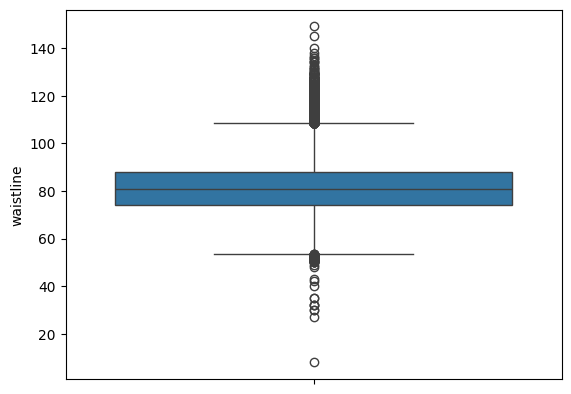

In [20]:
sns.boxplot(df["waistline"])

Видно, что теперь выброс происходит в другую сторону, а именно в меньшую сторону. Посмотрим, сколько таких данных всего:

In [21]:
df[df["waistline"] < 20].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
796004,1,75,140,40,8.0,0.1,0.4,1,1,120,...,85,256,11.0,1,0.8,59,67,60,1,0


Была обнаружена всего лишь одна строка, следовательно, можно без угрызения совести отфильтровать данные таким образом, чтобы данное значение не попало в отфильтрованный датафрейм. Фильтрация происходит благодаря функции `.loc()`, которая предоставляет доступ к группе строк и столбцов по меткам или логическому выражению. Также, выведем диаграмму еще раз, чтобы посмотреть наличие выбросов в данных. 

<Axes: xlabel='waistline', ylabel='Count'>

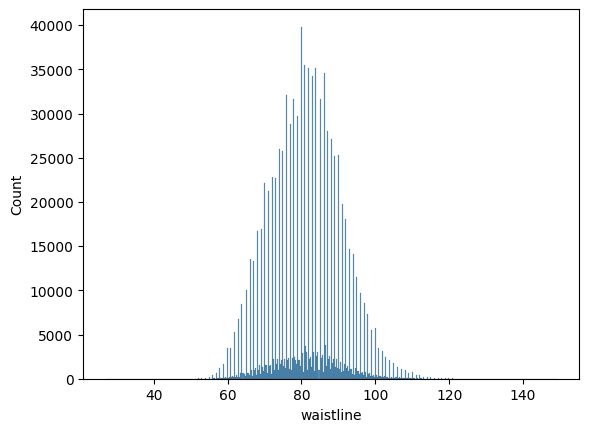

In [22]:
df = df.loc[df["waistline"] > 20]
sns.histplot(df["waistline"])

### HDL_chole

Также, как и в предыдущий раз, для начала выведем диаграмму 'ящик с усами' при помощи метода `.boxplot()`, который поможет оценить наличие выбросов в данных.

<Axes: ylabel='HDL_chole'>

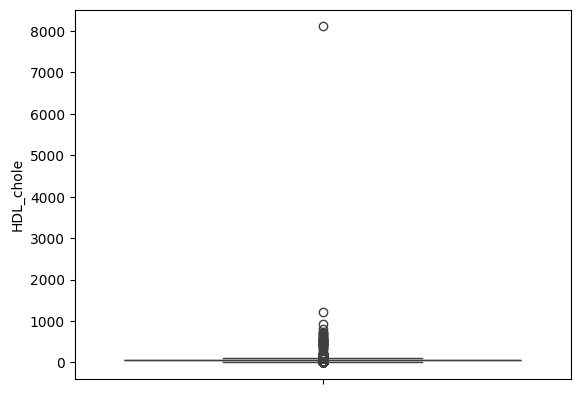

In [23]:
sns.boxplot(df["HDL_chole"])

Из приведённого выше графика наглядно видно, что присутствует выброс в данных. Попробуем выяснить количество данных с таким выбросом.

In [24]:
df[df["HDL_chole"] > 2000].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
7075,1,20,160,55,67.0,0.3,0.5,1,1,105,...,5119,9490,14.0,1,0.8,21,15,18,1,0


Была обнаружена всего лишь одна строка, значит, мы можем спокойно от неё избавится, отфильтровав исходный датафрейм.

In [25]:
df = df.loc[df["HDL_chole"] < 2000]

### LDL_chole

Для данного столбца, как и в предыдущих двух случаях, выведем диаграмму и посмотрим на наличие выбросов.

<Axes: ylabel='LDL_chole'>

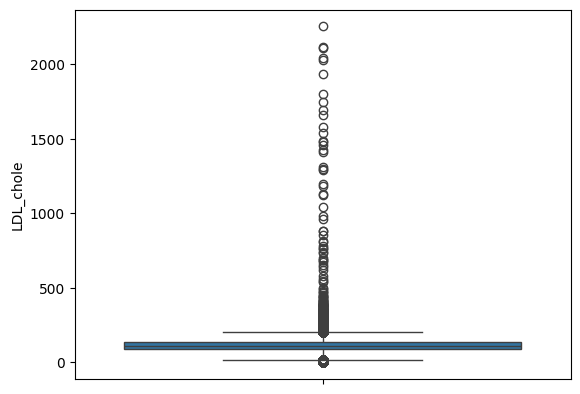

In [26]:
sns.boxplot(df["LDL_chole"])

При сравнении данного графика с тем, который был представлен изначально, можно заметить, что выброс, который был в данном столбце, ушел при устранении выбросов в других столбцах. Значит, можно переходит к следующему столбцу.

### Triglyceride

Посмотрим на 'ящик с усами' для данного столбца.

<Axes: ylabel='triglyceride'>

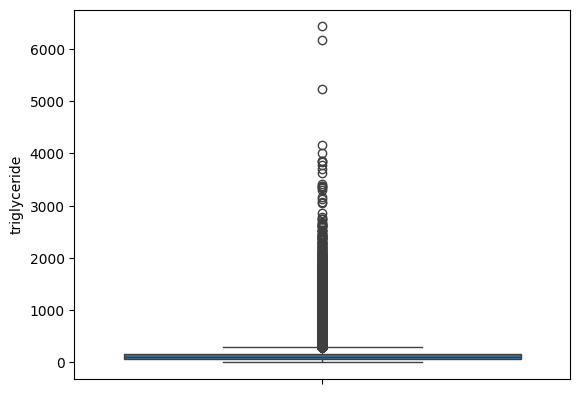

In [27]:
sns.boxplot(df["triglyceride"])

Из полученной диаграммы видно, что в данных содержатся выбросы. Попробуем оценить количество строк с выбросом.

In [28]:
df[df["triglyceride"] > 5000].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
81001,1,40,155,75,88.5,0.6,0.7,1,1,136,...,70,5236,17.3,3,0.6,28,18,28,3,1
105334,0,55,165,55,79.0,0.6,0.6,1,1,150,...,39,6430,16.3,1,0.5,19,16,477,3,1
220459,0,40,165,90,103.0,1.2,1.5,1,1,118,...,54,6173,19.3,1,0.6,26,43,169,3,0


Всего таких строк имеется 3 штуки. Следовательно, удалим данные строки из исходного набора данных.

In [29]:
df = df.loc[df["triglyceride"] < 5000]

### SGOT_AST и SGOT_ALT

Также, как и в предыдущие разы, посмотрим на диаграмму, полученную после выполнения метода `.boxplot()` для обоих столбцов.

<Axes: ylabel='SGOT_ALT'>

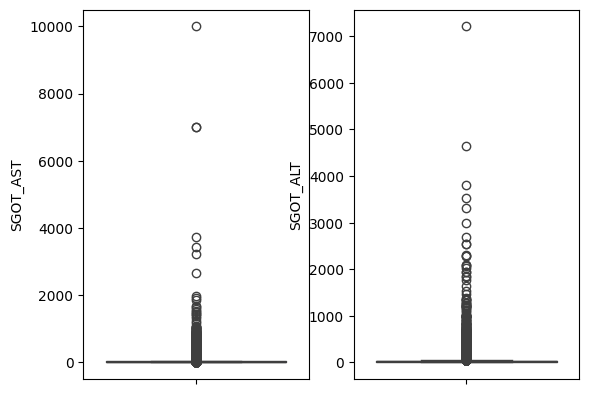

In [30]:
plt.subplot(1, 2, 1)
sns.boxplot(df["SGOT_AST"])
plt.subplot(1, 2, 2)
sns.boxplot(df["SGOT_ALT"])

Явно видны по 2 точки в данных, которые являются выбросами. Оценим количество таких строк.

In [31]:
df[(df["SGOT_AST"] > 6000) | (df["SGOT_ALT"] > 4000)]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
536962,0,50,170,45,66.0,0.9,0.7,1,1,96,...,69,67,15.4,1,1.2,9999,380,419,3,1
609072,1,40,170,70,76.0,1.0,1.0,1,1,123,...,71,159,15.5,1,0.9,1052,7210,270,1,1
642779,0,40,175,75,82.0,1.0,1.2,1,1,160,...,62,362,15.7,4,1.3,7000,3307,280,2,1
804428,0,55,170,70,90.0,1.0,1.0,1,1,100,...,52,120,15.9,4,2.2,7000,3807,429,1,0
808591,0,65,165,65,81.0,0.6,0.7,1,1,135,...,112,113,13.3,1,1.0,43,4633,9,3,1


Видно, что таких строк всего лишь 5 штук. Поскольку их слишком мало, то удалим их.

In [32]:
df = df[(df["SGOT_AST"] < 6000)]
df = df[(df["SGOT_ALT"] < 4000)]

<Axes: ylabel='SGOT_ALT'>

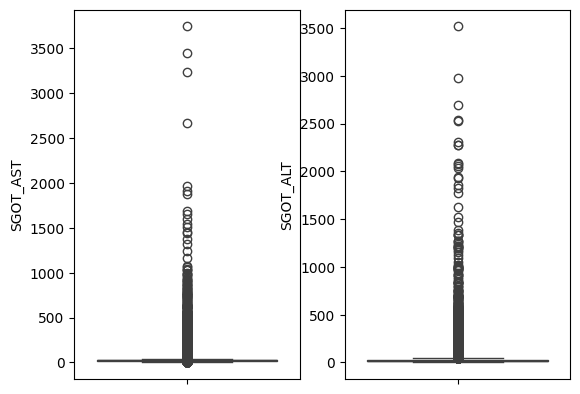

In [33]:
plt.subplot(1, 2, 1)
sns.boxplot(df["SGOT_AST"])
plt.subplot(1, 2, 2)
sns.boxplot(df["SGOT_ALT"])

In [34]:
df.describe()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,...,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000,991310.000000
mean,0.468993,47.614525,162.240550,63.283877,81.180553,0.980836,0.978429,1.031496,1.030476,122.432341,...,113.032786,132.112708,14.229799,1.094214,0.860465,25.964218,25.735741,37.134348,1.608107,0.499813
std,0.499038,14.181341,9.282919,12.514080,9.591135,0.605955,0.604781,0.174653,0.171893,14.543016,...,35.488420,101.253947,1.584913,0.437697,0.480536,18.773241,24.357209,50.417811,0.818501,0.500000
min,0.000000,20.000000,130.000000,25.000000,27.000000,0.100000,0.100000,1.000000,1.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,0.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000
75%,1.000000,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000
max,1.000000,85.000000,190.000000,140.000000,149.100000,9.900000,9.900000,2.000000,2.000000,273.000000,...,2254.000000,4164.000000,25.000000,6.000000,98.000000,3742.000000,3517.000000,999.000000,3.000000,1.000000


В качестве результата работы на данном этапе сохраним полученный очищенный набор данных в новый CSV файл.

In [35]:
df.to_csv("cleaned_dataset.csv")

## Постановка задач <a id="23"></a>

Основная задача звучит следующим образом: *определение, употребляет ли алкоголь конкретный пациент*. Данная задача обоснована тем, что при сборе анамнеза пациент может умышленно лгать лечащему врачу, в связи с этим назначенное лечение может неэффективным. 

Также, помимо основной задачи было выявлено еще ряд дополнительных подзадач, которые позволят более детально изучить данные:
1) Как изменяются параметры организма человека в зависимости от того, курит он или нет?
2) Каков обобщённый портрет курильщика?
3) Каков обобщённый портрет выпивающего человека?
4) На какие параметры организма алкоголь влияет сильнее всего?
5) Влияет ли наличие вредных привычек на возникновение сердечных/почечных проблем?

Рассмотрим данные подзадачи по отдельности

### Корреляция параметров организма и курения <a id="231"></a>

Для того, чтобы получить ответ на первую подзадачу, необходимо сравнить между собой две категории людей: некурящих и курящих. Такое разделение можно создать при помощи атрибута `SMK_stat_type_cd`. Также, существует и третья категория - бросивших курить - однако с ней возникает проблема - как обрабатывать таких людей. Поэтому было принято решение исключить данную категорию людей из рассмотрения.

В начале разобьём исходный датафрейм на два (соответствующие требуемым категориям).

In [36]:
smoking = df[df["SMK_stat_type_cd"] == 3]
not_smoking = df[df["SMK_stat_type_cd"] == 1]

Для начала оценим количество людей в каждой из категории.

In [37]:
print(
    f"""Количество курящих людей в наборе: {len(df[df["SMK_stat_type_cd"] == 3])}
Количество некурящих людей в наборе: {len(df[df["SMK_stat_type_cd"] == 1])}"""
)

Количество курящих людей в наборе: 213940
Количество некурящих людей в наборе: 602427


Как видно из полученных значений, некурящих людей практически в 3 раза больше, чем курящих. Это может говорит о несбалансированность классов, однако данное исследование не является основной задачей, в следствии чего данный недочёт можно опустить.

Рассмотрим параметры, связанные с давлением, а именно систолическое (**SBP**) и диастолические (**DBP**) артериальное давление.

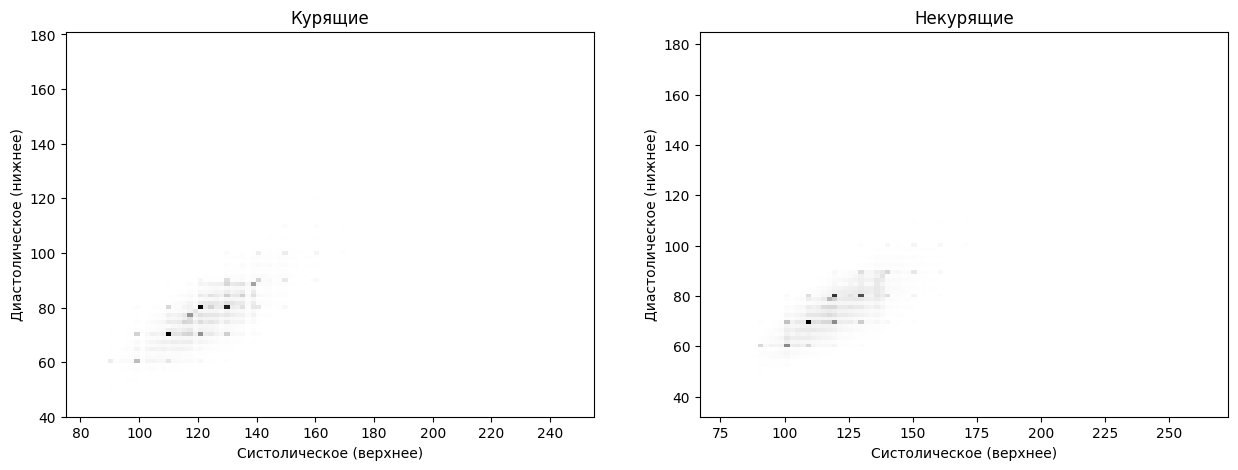

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist2d(smoking['SBP'], smoking['DBP'], bins=100, cmap='binary')
plt.xlabel('Систолическое (верхнее)')
plt.ylabel('Диастолическое (нижнее)')
plt.title('Курящие')
plt.subplot(1, 2, 2)
plt.hist2d(not_smoking['SBP'], not_smoking['DBP'], bins=100, cmap='binary')
plt.xlabel('Систолическое (верхнее)')
plt.ylabel('Диастолическое (нижнее)')
plt.title('Некурящие')
plt.show()

Исходя из полученных диаграмм, можно сделать вывод о том, что если разница между ними и присутствует, то незначительная и её можно списать как погрешность. Для более точного сравнения двух параметров между группами, выведем среднее значение каждого из параметров и оценим разницу между средними

In [39]:
ratio_SBP = smoking["SBP"].mean() / not_smoking["SBP"].mean()
ratio_DBP = smoking["DBP"].mean() / not_smoking["DBP"].mean()
print(f"Среднее значение SBP для курящих: {smoking['SBP'].mean():.2f}")
print(f"Среднее значение SBP для некурящих: {not_smoking['SBP'].mean():.2f}")
print(f"Отношение курящие/некурящие: {ratio_SBP:.2f}")
print(f"Среднее значение SBP для курящих: {smoking['DBP'].mean():.2f}")
print(f"Среднее значение SBP для некурящих: {not_smoking['DBP'].mean():.2f}")
print(f"Отношение курящие/некурящие: {ratio_DBP:.2f}")

Среднее значение SBP для курящих: 123.58
Среднее значение SBP для некурящих: 121.18
Отношение курящие/некурящие: 1.02
Среднее значение SBP для курящих: 77.61
Среднее значение SBP для некурящих: 74.92
Отношение курящие/некурящие: 1.04


Таким образом, из полученных статистических результатов видно, то **не существует** никакой взаимосвязи между давлением и отношением человека к курению.

Далее, рассмотрим параметры, связанные с уровнем холестерина в крови у пациента. К данным параметрам относятся: общий уровень, уровень липопротеидов высокой и низкой плотности. Сперва выведем диаграмму, показывающую общий уровень холестерина в крови.

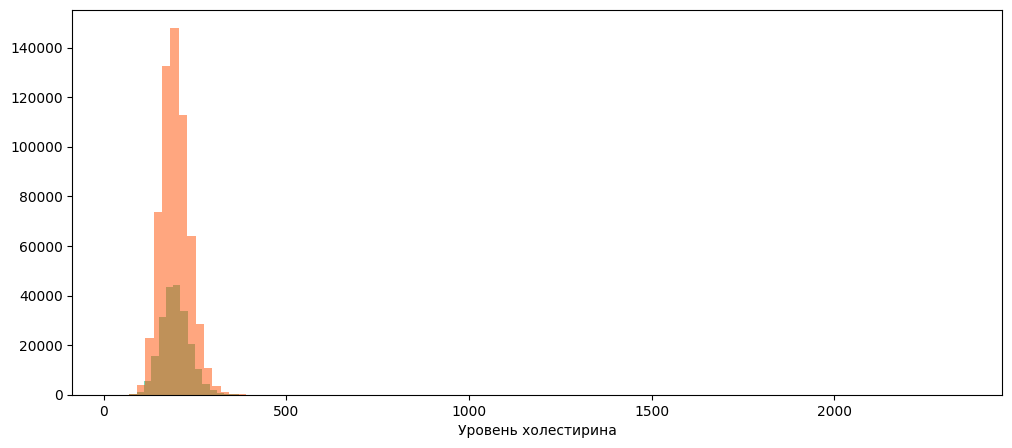

In [40]:
colors = ["#00AC6B", "#FF4F00"]
labels = ["Курящие", "Некурящие"]
plt.figure(figsize=(12, 5))
plt.hist(smoking["tot_chole"], bins=100, color=colors[0], label=labels[0], alpha=0.5)
plt.hist(not_smoking["tot_chole"], bins=100, color=colors[1], label=labels[1], alpha=0.5)
plt.xlabel("Уровень холестирина")
plt.show()

Как видно из полученных гистограмм, никаких значительных отличий в уровне холестерина не было обнаружено. Продолжим построение диаграмм и выведем точечную диаграмму, отражающую данные об уровне липопротеидов высокой (**HDL**) и низкой (**LDL**) плотности

<Axes: xlabel='HDL_chole', ylabel='LDL_chole'>

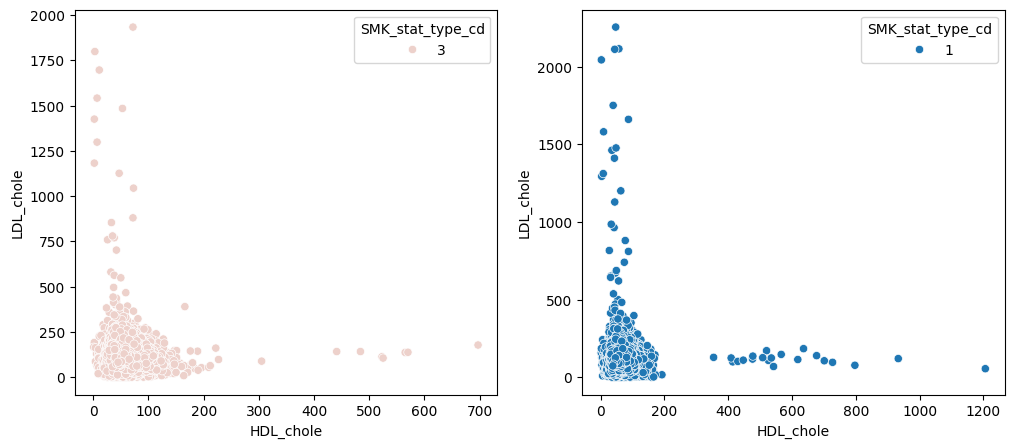

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=smoking, x="HDL_chole", y="LDL_chole", hue="SMK_stat_type_cd")
plt.subplot(1, 2, 2)
sns.scatterplot(data=not_smoking, x="HDL_chole", y="LDL_chole", hue="SMK_stat_type_cd")

Из полученных диаграмм видно, что серьезных отличий между группами не наблюдается.

Далее, точно таким же образом рассмотрим уровни триглицерина (**triglyceride**) и гемоглобина (**hemoglobin**) по категориям:

<Axes: xlabel='hemoglobin', ylabel='Count'>

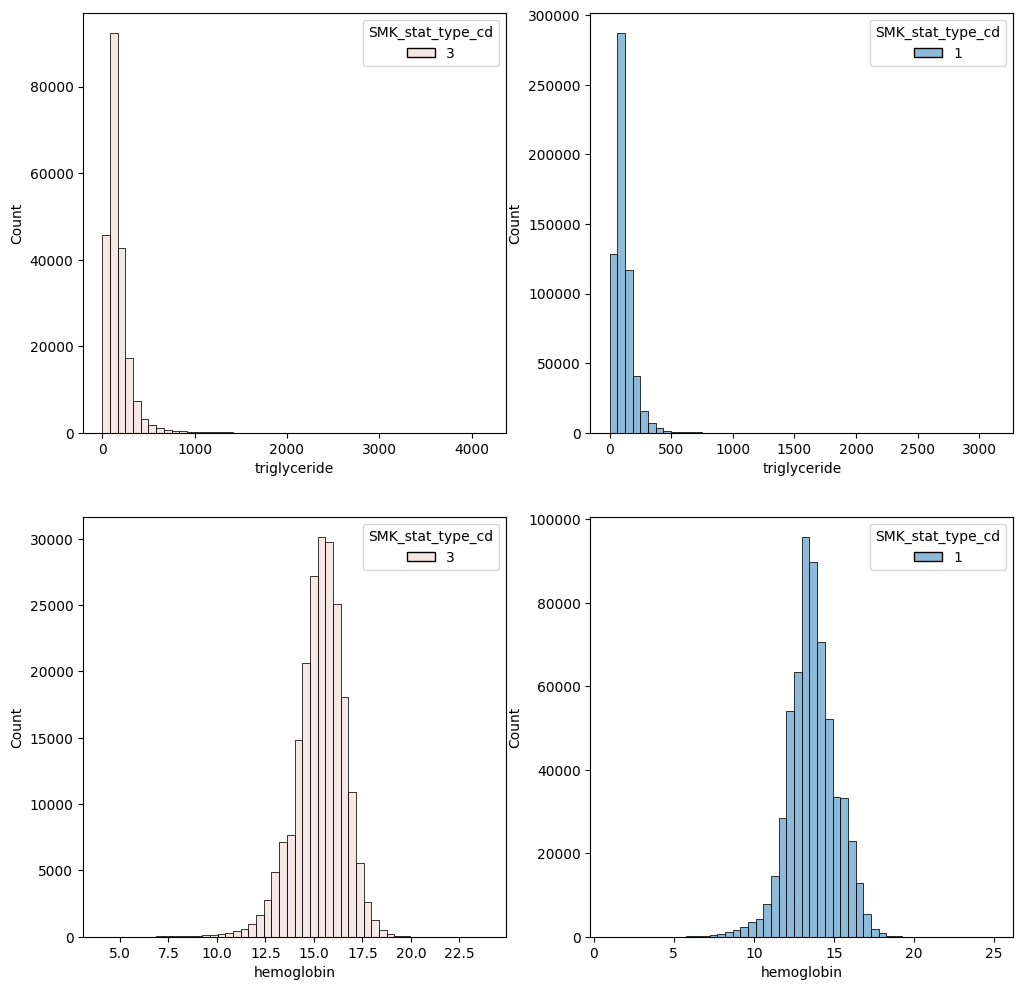

In [42]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.histplot(
    data=smoking,
    x="triglyceride",
    bins=50,
    hue="SMK_stat_type_cd",
)
plt.subplot(2, 2, 2)
sns.histplot(
    data=not_smoking,
    x="triglyceride",
    bins=50,
    hue="SMK_stat_type_cd",
)
plt.subplot(2, 2, 3)
sns.histplot(
    data=smoking,
    x="hemoglobin",
    bins=50,
    hue="SMK_stat_type_cd",
)
plt.subplot(2, 2, 4)
sns.histplot(
    data=not_smoking,
    x="hemoglobin",
    bins=50,
    hue="SMK_stat_type_cd",
)

Как видно из полученных диаграмм, никаких значительных отличий в уровнях данных анализов **не было обнаружено**. В связи с этим, перейдем к рассмотрению заключительных двух параметров, а именно уровню АСТ и АЛТ в крови.

<Axes: xlabel='SGOT_AST', ylabel='SGOT_ALT'>

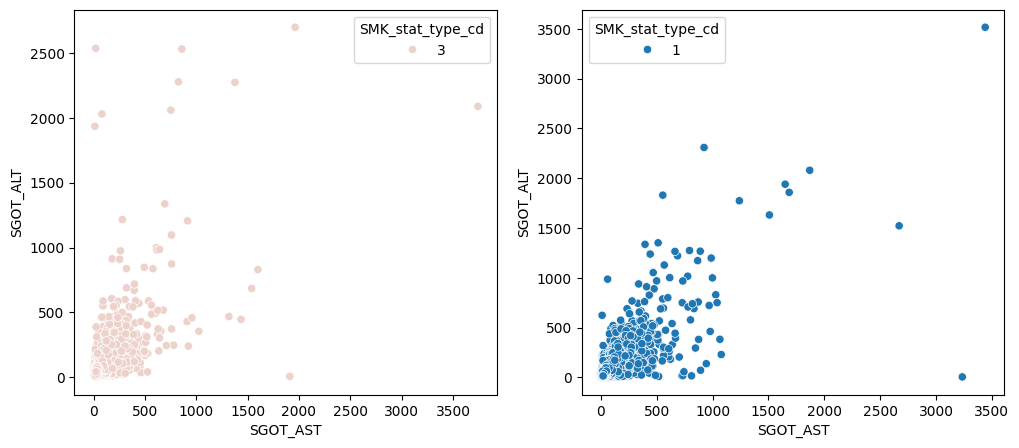

In [43]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=smoking, x="SGOT_AST", y="SGOT_ALT", hue="SMK_stat_type_cd")
plt.subplot(1, 2, 2)
sns.scatterplot(data=not_smoking, x="SGOT_AST", y="SGOT_ALT", hue="SMK_stat_type_cd")

Как видно из полученных результатов, никаких значительных отличий в данных двух параметрах **не было обнаружено**.

Таким образом, подводя итог к проделанной работе в данной части, можно сделать вывод о том, что факт курения человека ни коим образом не влияет на собранные в ходе данного эксперимента параметры организма.

### Обобщённый портрет курильщика <a id="232"></a>

В качестве выводов в предыдущем пункте было получено, что столбец `SMK_stat_type_cd` можно рассматривать как дополнительный параметр. Однако, для того, чтобы утверждать, что данный столбец действительно требуется, необходимо выявить зависимость между данным параметром и целевой переменной.

Для этого, построим обобщённый портрет курильщика на основе предоставленных данных. Поскольку в ходе выполнения предыдущего этапа был создан датафрейм `smoking`, который содержит данные только курящих людей, то будем строить графики на основе данного набора.

Для начала стоит выяснить, как распределены курильщики между полами. Иначе говоря, выяснить, кого больше: курящих женщин или мужчин?

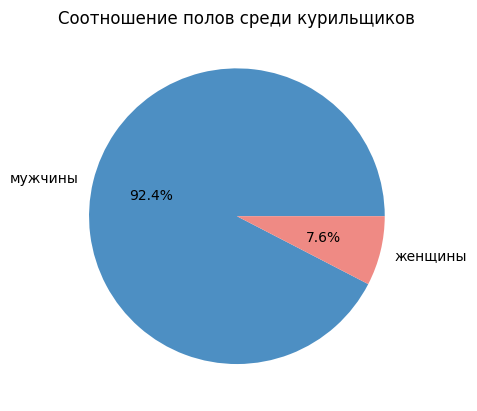

In [44]:
peoples = [len(smoking[smoking["sex"] == 0]), len(smoking[smoking["sex"] == 1])]
labels = ["мужчины", "женщины"]

fig, ax = plt.subplots()
ax.pie(peoples, labels=labels, autopct="%1.1f%%", colors=["#4D8FC3", "#EF8A84"])
ax.set_title("Соотношение полов среди курильщиков")
plt.show()

Как видно из полученной диаграммы, подавляющее **большинство курильщиков - мужчины**. Однако, присутствует немалый процент курящих женщин. 

Далее посмотрим, как распределены возраста курящих людей в зависимости от пола:

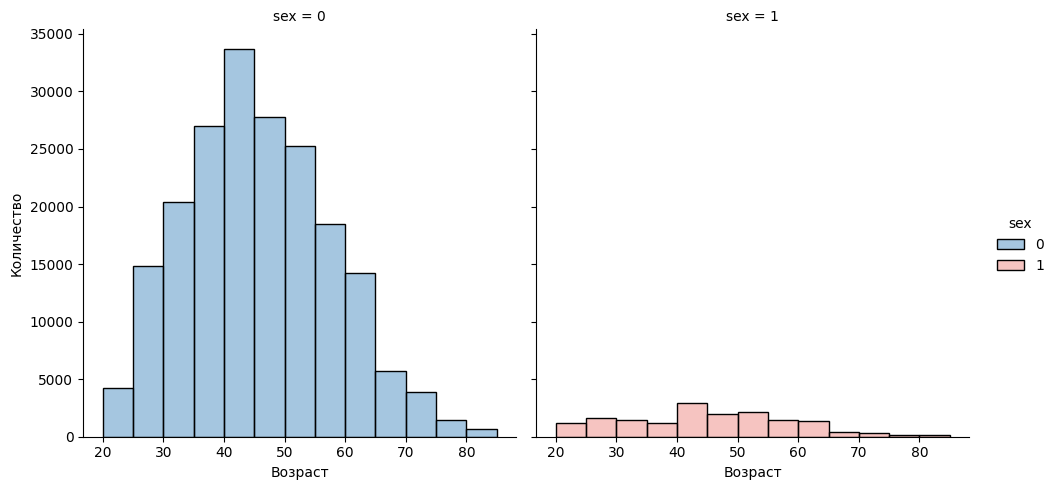

In [45]:
g = sns.displot(
    data=smoking,
    x="age",
    col="sex",
    binwidth=5,
    palette=["#4D8FC3", "#EF8A84"],
    hue="sex",
)
g.set_axis_labels(x_var="Возраст", y_var="Количество")

Как видно из полученной гистограммы, подавляющее большинство курильщиков (как мужчин, так и женщин) относятся находятся в **возрасте 40-45 лет**.

Таким образом, обобщённый портрет курильщика немного различается в зависимости от пола человека в связи с биологическими отличиями. Получены следующие результаты:
* Мужчины (92%): возраст: 40-45 лет
* Женщины (8%): возраст: 40-45 лет

Но, поскольку 92% курящих людей - мужчины, то в качестве окончательного ответа на вопрос об обобщенном портрете следует дать все-таки портрет мужчины курильщика.

### Обобщённые портрет выпивающего человека <a id="233"></a>

Однако, полученное в ходе выполнения предыдущего этапа знание об обобщённом портрете курильщика, данное знание ни в какой степени не объясняет нам, для чего в исходном наборе данных присутствует этот атрибут. Поэтому, для того, чтобы привязать этот столбец к целевой переменной, необходимо создать обобщённый портрет пьющего человека.

Для начала, также, как и в предыдущий раз, разобьем исходный набор данных на 2 по целевой переменной.

In [46]:
drinkers = df[df["DRK_YN"] == 1]
not_drinkers = df[df["DRK_YN"] == 0]

Определять соотношение пьющих людей к непьющим не имеет смысла, поскольку это уже было проделано на этапе определения сбалансированности классов, поэтому приведём лишь результаты, полученные в ходе выполнения того этапа:
* Количество непьющих: 495840
* Количество пьющих: 495470

Далее выясним соотношение пьющих людей по половому признаку. Для этого также, как и в предыдущем этапе создадим круговую диаграмму, отражающую данное соотношение.

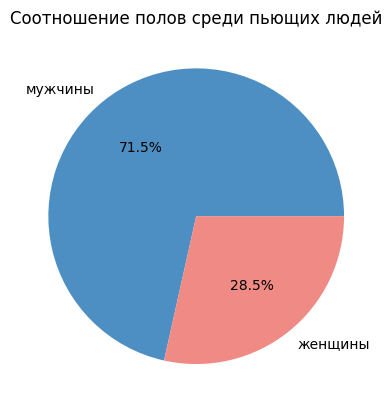

In [47]:
peoples = [len(drinkers[drinkers["sex"] == 0]), len(drinkers[drinkers["sex"] == 1])]
labels = ["мужчины", "женщины"]

fig, ax = plt.subplots()
ax.pie(peoples, labels=labels, autopct="%1.1f%%", colors=["#4D8FC3", "#EF8A84"])
ax.set_title("Соотношение полов среди пьющих людей")
plt.show()

Как видно из полученной диаграммы, ситуация значительно отличается от той, которая была ранее при создании портрета курильщика. В данном случае, более одной четвертой среди всех опрошенных людей - женщины, в то время как при опросе курильщиков - таковых было всего лишь 7,6%.

Далее, изучим распределение возрастов среди разных полов:

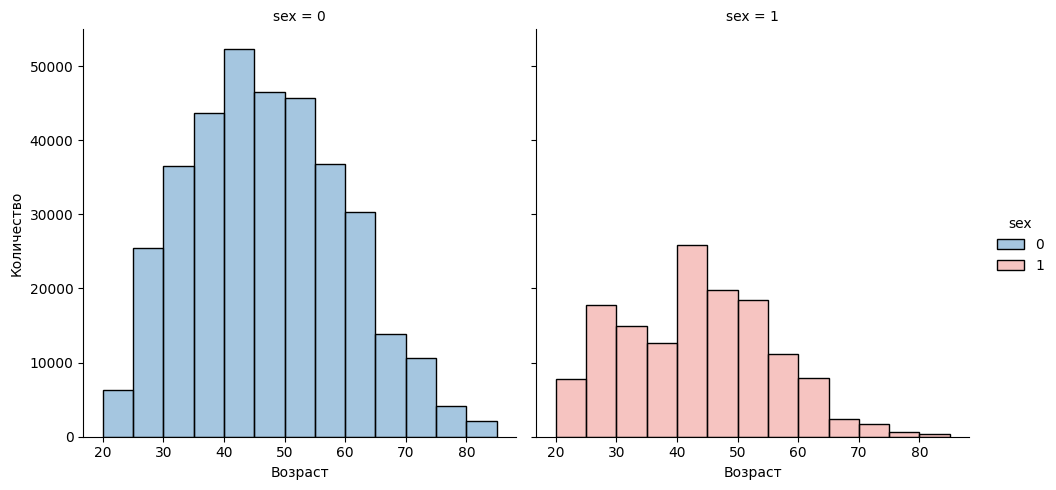

In [48]:
g = sns.displot(
    data=drinkers,
    x="age",
    col="sex",
    binwidth=5,
    palette=["#4D8FC3", "#EF8A84"],
    hue="sex",
)
g.set_axis_labels(x_var="Возраст", y_var="Количество")

Как видно из полученных гистограмм, большинство людей, употребляющих алкоголь относятся к возрастной категории **40-45 лет**. При составлении портрета курящих людей был получен тот же возрастной диапазон.

Из полученных результатов видно, то относительно данных параметров обобщённый портрет людей, употребляющих спиртные напитки никак не отличается от обобщённого портрета курящих людей.

Однако, в качестве заключительного этапа при составлении портрета пьющего человека, построим диаграмму, показывающие соотношение курящих и не курящих людей среди людей, употребляющих спиртные напитки. Помимо этого, построим такую диаграмму для непьющих людей и сравним разницу между полученными диаграммами.

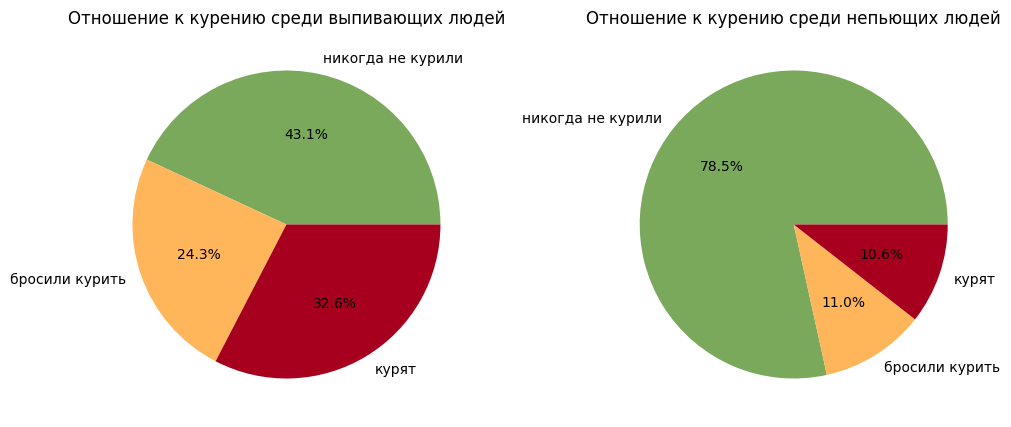

In [49]:
peoples_drinking = [
    len(drinkers[drinkers["SMK_stat_type_cd"] == 1]),
    len(drinkers[drinkers["SMK_stat_type_cd"] == 2]),
    len(drinkers[drinkers["SMK_stat_type_cd"] == 3]),
]
peoples_not_drinking = [
    len(not_drinkers[not_drinkers["SMK_stat_type_cd"] == 1]),
    len(not_drinkers[not_drinkers["SMK_stat_type_cd"] == 2]),
    len(not_drinkers[not_drinkers["SMK_stat_type_cd"] == 3]),
]
labels = ["никогда не курили", "бросили курить", "курят"]
colors = ["#7aa95c", "#ffb55a", "#a7001e"]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].pie(peoples_drinking, labels=labels, autopct="%1.1f%%", colors=colors)
ax[0].set_title("Отношение к курению среди выпивающих людей")
ax[1].pie(peoples_not_drinking, labels=labels, autopct="%1.1f%%", colors=colors)
ax[1].set_title("Отношение к курению среди непьющих людей")
plt.show()

Как видно из первой диаграммы, больше половины когда-либо курили на постоянной основе. Также, если сравнивать между собой две диаграммы, можно обратить внимание на то, что подавляющее большинство людей, которые негативно относятся к алкоголю, также негативно относятся и к курению.

Таким образом, обобщённый портрет выпивающего человека в зависимости от пола будет немного отличаться в связи с биологическими различиями:
* Мужчины (72%): возраст: 40-45 лет
* Женщины (28%): возраст: 40-45 лет


Однако, отличительной особенностью выпивающих людей является их склонность к курению, поскольку 56% опрошенных людей когда-либо курили.

### Влияние алкоголя на состояние организма <a id="234"></a>

В качестве заключительной части при выполнении исследовательского анализа данных хотелось бы выяснить, на какие столбцы сильнее всего влияет факт употребления человеком спиртных напитков. Для этого, необходимо сравнить между собой результаты анализов у двух групп: выпивающих и непьющих людей.

Сперва посмотрим, как алкоголь влияет на систолическое и диастолическое артериальные давления (столбцы `SBP` и `DBP`) соответственно.

<Axes: xlabel='SBP', ylabel='DBP'>

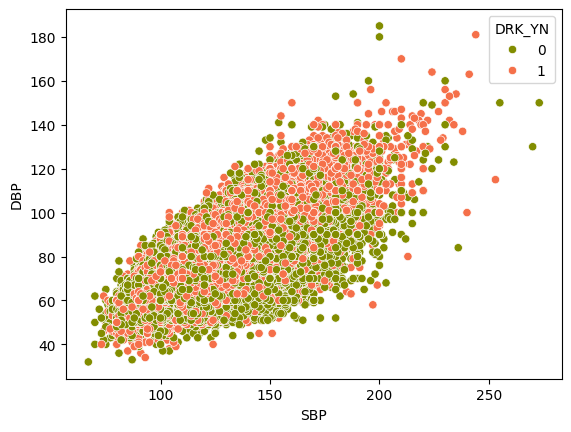

In [50]:
sns.scatterplot(data=df, x="SBP", y="DBP", hue="DRK_YN", palette=["#828D00", "#F5704A"])

Исходя из полученной точечной диаграммы не получается заметить существенную разницу между категориями.


Далее, сравним уровень глюкозы в организмах выпивающего и непьющего человека (столбец `BLDS`).

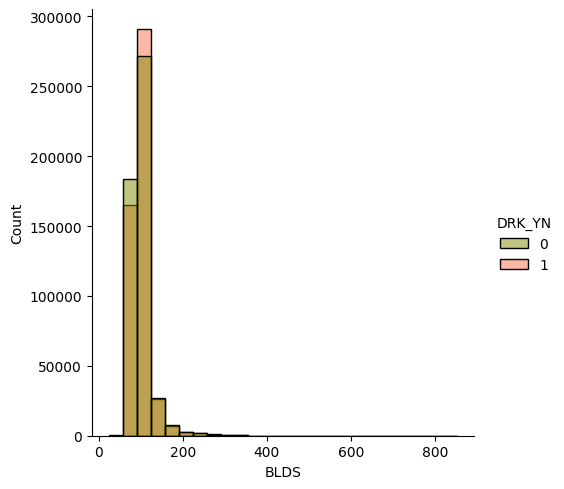

In [51]:
sns.displot(
    data=df,
    x="BLDS",
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
    bins=25,
)

Как можно заметить по полученной гистограмме, значительных отличий в результатах уровня глюкозы, также, как и в предыдущий раз, не наблюдается.

Далее, точно таким же образом рассмотрим значения уровня холестерина липопротеидов высокой и низкой плотности (`HDL_chole` и `LDL_chole`) между группами. Полученные диаграммы показаны ниже:

<Axes: xlabel='HDL_chole', ylabel='LDL_chole'>

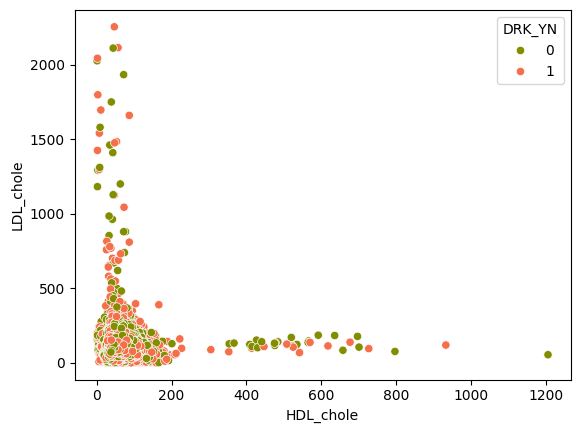

In [52]:
sns.scatterplot(
    data=df, x="HDL_chole", y="LDL_chole", hue="DRK_YN", palette=["#828D00", "#F5704A"]
)

Как видно по приведённой выше диаграмме, никаких значительных отличий не было обнаружено. Для закрепления полученного результата сравним между собой значения столбца `tot_chole` у данных групп.

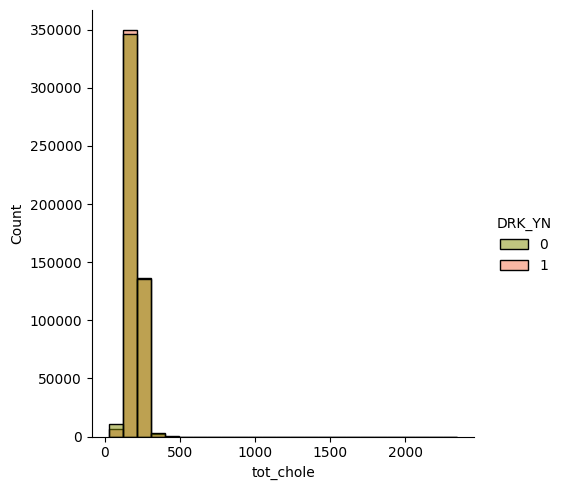

In [53]:
sns.displot(
    data=df,
    x="tot_chole",
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
    bins=25,
)

Из данной диаграммы видно, что разницы между данными классами не было обнаружено.

Рассмотрим следующие два параметра, а именно столбцы `triglyceride` и `hemoglobin` и сравним, отличаются ли значения данных параметров между приведёнными категориями респондентов.

<Axes: title={'center': 'Уровень гемоглобина'}, xlabel='hemoglobin', ylabel='Count'>

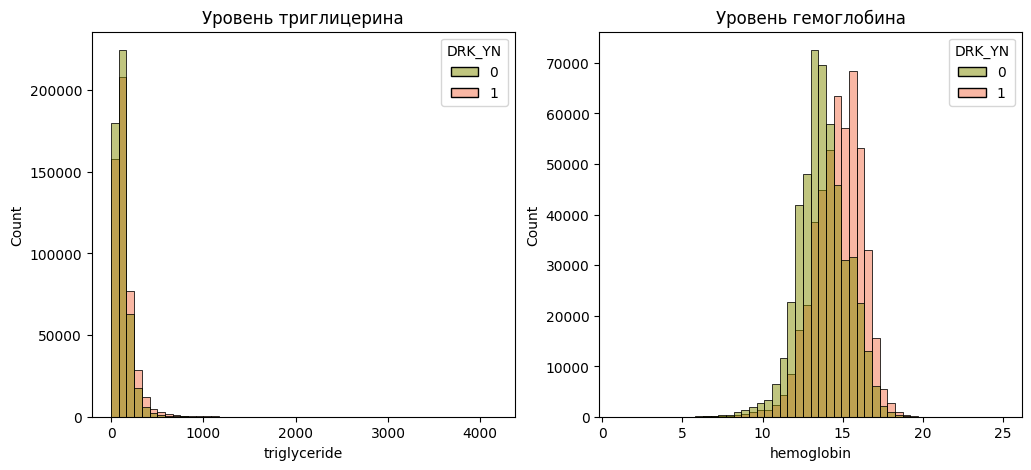

In [54]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Уровень триглицерина")
sns.histplot(
    data=df,
    x="triglyceride",
    bins=50,
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
)
plt.subplot(1, 2, 2)
plt.title("Уровень гемоглобина")
sns.histplot(
    data=df,
    x="hemoglobin",
    bins=50,
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
)

Из приведённых выше диаграмм видно, что уровень триглицерина в крови между выпивающими и непьющими людьми не имеет никаких отличий. Однако, тоже самое нельзя сказать и про уровень гемоглобина в крови у пациентов разных групп, ведь у непьющих людей средний уровень незначительно ниже, чем у выпивающих.

Далее, сравним между собой показатель количества белка в урине респондентов разных категорий.

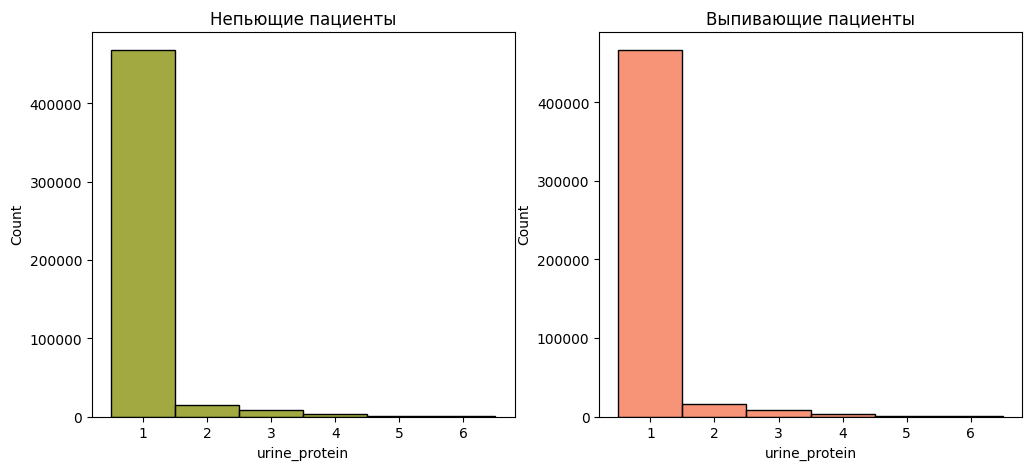

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Непьющие пациенты")
sns.histplot(
    data=not_drinkers,
    x="urine_protein",
    color="#828D00",
    discrete=True,
)
plt.subplot(1, 2, 2)
plt.title("Выпивающие пациенты")
sns.histplot(
    data=drinkers,
    x="urine_protein",
    color="#F5704A",
    discrete=True,
)
plt.show()

Исходя из полученных диаграмм, можно сделать вывод о том, что данный параметр ни коем образом не находится под влиянием того, как человек относится к употреблению горячительных напитков.

В качестве предпоследней диаграммы необходимо построить диаграмму с результатами анализа уровень на АСТ и АЛТ в крови пациентов. Созданная диаграмма показана ниже:

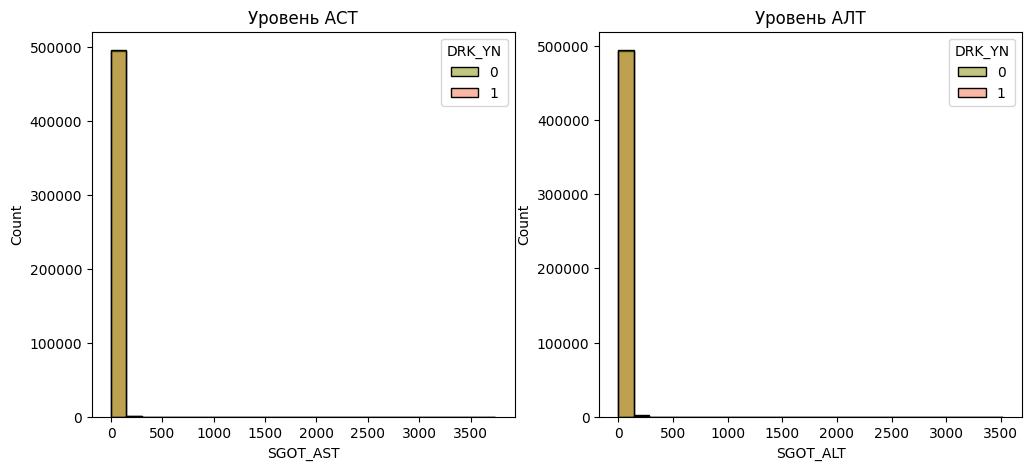

In [56]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Уровень АСТ")
sns.histplot(
    data=df, x="SGOT_AST", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.subplot(1, 2, 2)
plt.title("Уровень АЛТ")
sns.histplot(
    data=df, x="SGOT_ALT", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.show()

Из полученных графиков видно, что никаких отличий между группами в данных двух параметрах не существует.

И наконец, оценим значения уровня креатинина сыворотки и уровня гамма-ГТ в крови у пациентов с разным отношением к алкогольным напиткам.

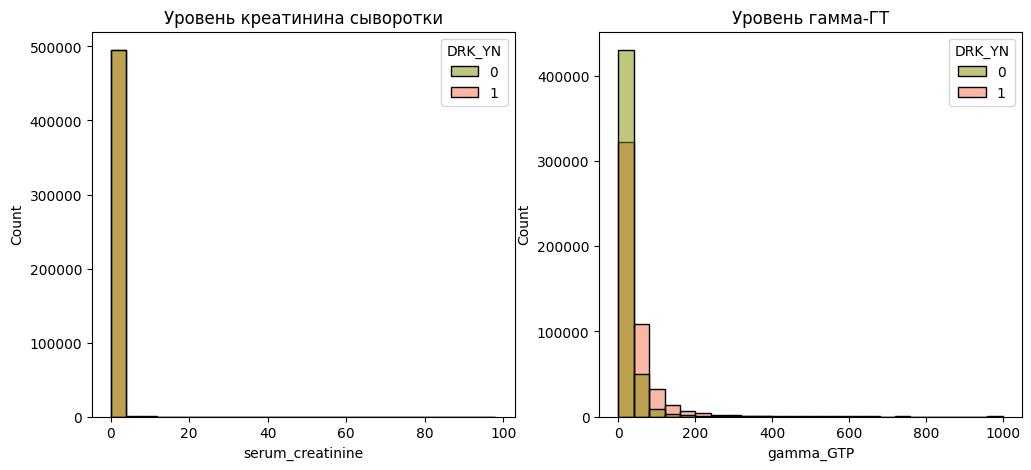

In [57]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Уровень креатинина сыворотки")
sns.histplot(
    data=df, x="serum_creatinine", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.subplot(1, 2, 2)
plt.title("Уровень гамма-ГТ")
sns.histplot(
    data=df, x="gamma_GTP", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.show()

Из полученных гистограмм видно, что уровень креатинина сыворотки никак не зависит от того, употребляет ли человек спиртные напитки или нет. Однако, уровень гамма-гт имеет незначительное отличие в зависимости от отношения человеку к алкоголю. Заметно, что уровень гамма-гт чаще выше у выпивающих людей, нежели у непьющих.

Также, полученные зависимости можно оценить при помощи тепловой карты, которая показывает корреляцию между параметрами внутри набора данных. Созданная тепловая карта показана на рисунке ниже:

<Axes: >

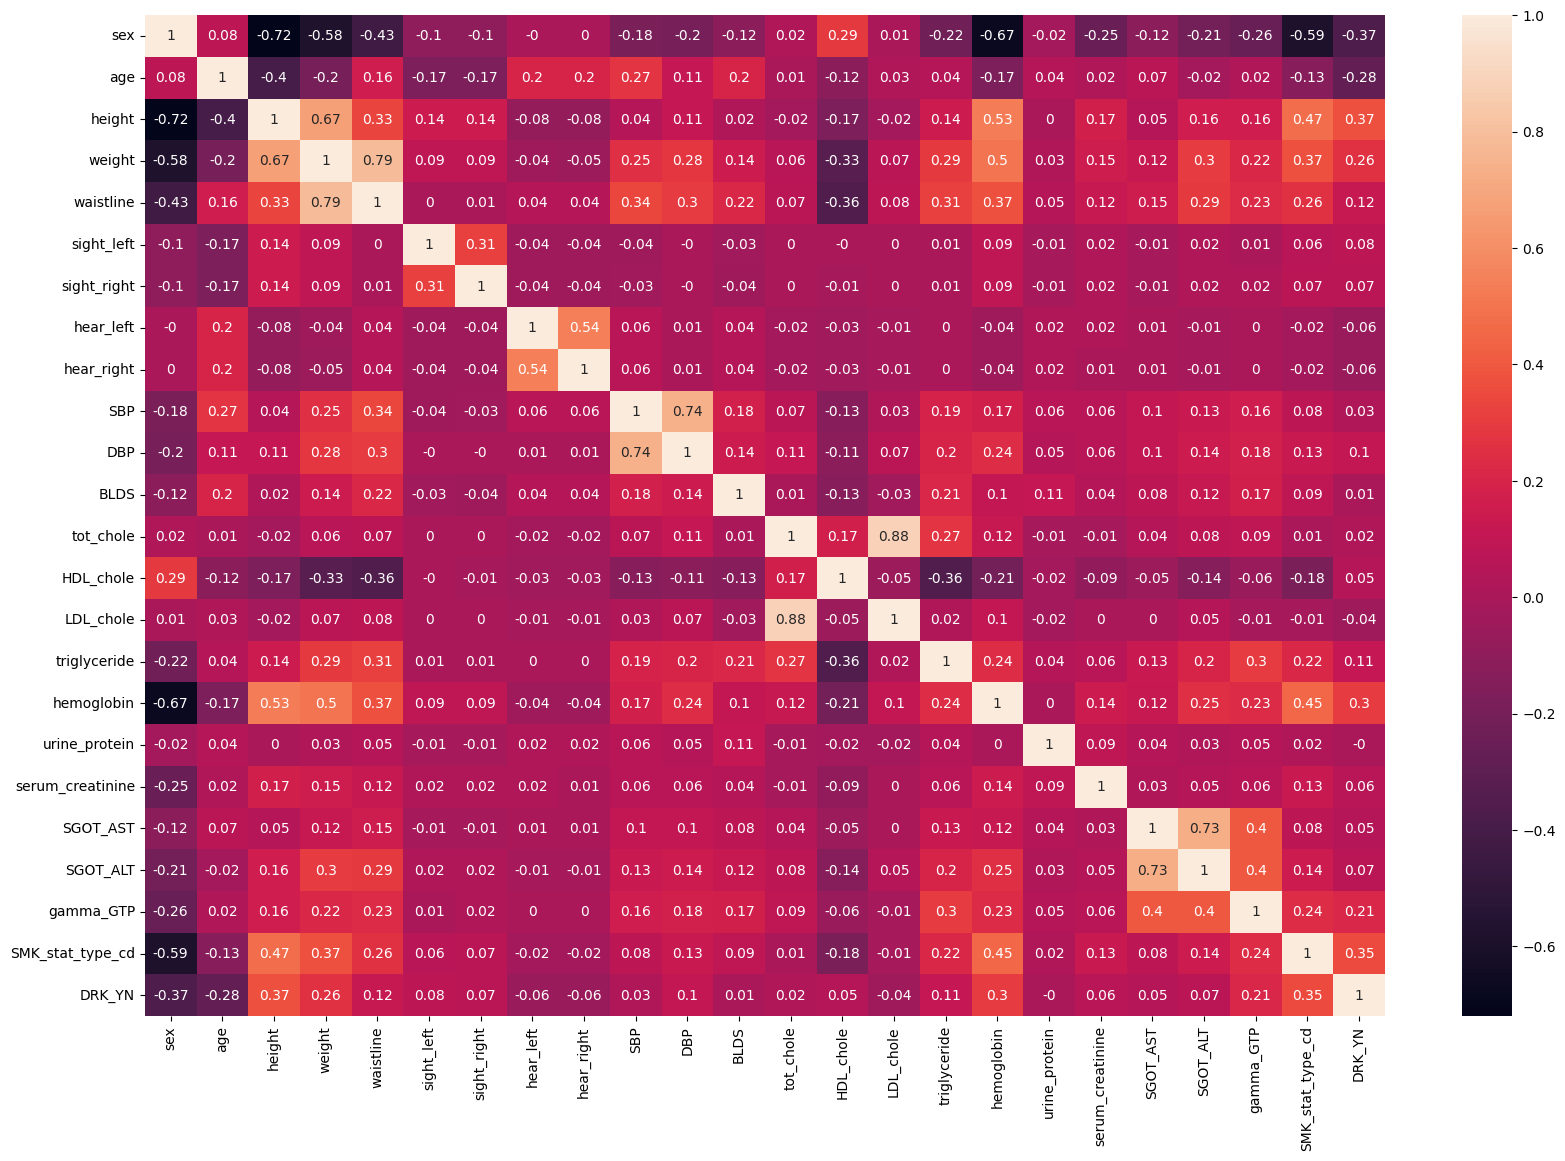

In [58]:
plt.figure(figsize = (20, 13))
sns.heatmap(round(df.corr(), 2), annot = True)

Если не брать во внимание колонки **height** и **weight** в связи их зависимости от пола, а также **SMK_stat_type_cd** в связи с зависимостью между курением и распитием спиртного, то видно, что наибольший коэффициент корреляции между столбцами `DRK_YN` к `gamma_GTP` (уровень гамма-гт), и `DRK_YN` к `hemoglobin` (уровень гемоглобина).

Таким образом, подводя итог к проделанной работе в ходе выполнения данного этапа, можно сказать, что алкоголь может влиять на 2 параметра организма: на уровень гемоглобина (отвечающий за удержание и доставку к органам, тканям молекул кислорода) и на уровень гамма-ГТ (отвечающий за биохимические превращения в печени и желчевыводящих путях).

С медицинской точки зрения при повышении уровня гемоглобина у человека наблюдается сгущение крови. В этом случае могут возникать такие состояния, как повышение артериального давления и ухудшение кровоснабжения в клетках тканей. Это, в свою очередь, увеличивает риск возникновение тромбоза, эмболии, инфаркта миокарда и инсульта. (тут должна быть плашка лучше обратиться к специалисту)

Если же уровень гамма-глютамилтранспептидаза (гамма-ГТ) повышен, то это свидетельствует о наличии холестаза. Активация фермента происходит при циррозах печени, инфекционных гепатитах, жировом гепатозе, различных новообразованиях и патологии желчевыводящих путей. (тут должна быть плашка лучше обратиться к специалисту)